# Exploratory Analysis
## Data Investigation

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Loading house price train dataset
df = pd.read_csv(r'../data/raw_data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [100]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Opening the above in a text editor reveals that there are many features that have varying proportions of missing data. To begin with we will drop any feature missing >=10% of data. We will then drop any rows with missing data for the remaining features.

In [101]:
# Dropping features with >=10% of data missing as well as the 'Id' column
all_cols = df.columns
thresh = len(df) * 0.9
df.dropna(thresh=thresh, axis=1, inplace=True)
df.drop(columns='Id', inplace=True)
remaining_cols = df.columns
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [102]:
# The dropped features are as follows
all_cols.drop(remaining_cols)

Index(['Id', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [103]:
# Dropping rows that contain null values
df.dropna(axis=0, inplace=True)
df.shape

(1338, 74)

Next we will look at the spread of numerical values in the dataset and try to identify any erroneous values.

In [127]:
# Spread of numerical data
pd.option_context('display.max_rows', None, 'display.max_columns', None)
print(df.describe())

        MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1338.000000    1338.000000  1338.000000  1338.000000  1338.000000   
mean     56.136024   10706.294469     6.219731     5.596413  1973.029148   
std      41.252576   10336.621126     1.324472     1.078124    29.563540   
min      20.000000    1300.000000     2.000000     2.000000  1880.000000   
25%      20.000000    7744.000000     5.000000     5.000000  1956.000000   
50%      50.000000    9600.000000     6.000000     5.000000  1976.000000   
75%      70.000000   11760.750000     7.000000     6.000000  2001.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1338.000000  1338.000000  1338.000000  1338.000000  1338.000000  ...   
mean    1985.668909   110.360239   464.234679    49.218236   582.494768  ...   
std       20.296463   185.604816   458.792420   166.196584   439.950528  ..

Since there does not appear to be any erroneous numerical values we can now move onto the data visualisation.

## Data Visualisation

To begin with we will look at the distribution of the 'SalePrice' target. Then we will move onto looking at the quantitative and qualitative features.

### Sale Price

In [105]:
# Looking specifically at the distribution of the 'SalePrice' target.
df['SalePrice'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

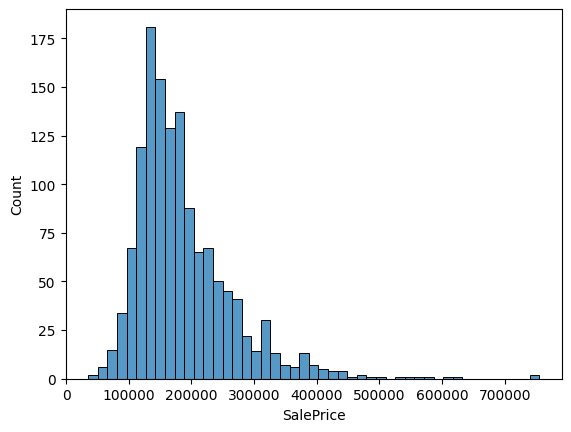

In [107]:
sns.histplot(df, x='SalePrice')

We can see that this is a right-skewed distribution so taking the log-transform of the SalePrice may help to normalise the distribution.

<AxesSubplot: xlabel='log_salePrice', ylabel='Count'>

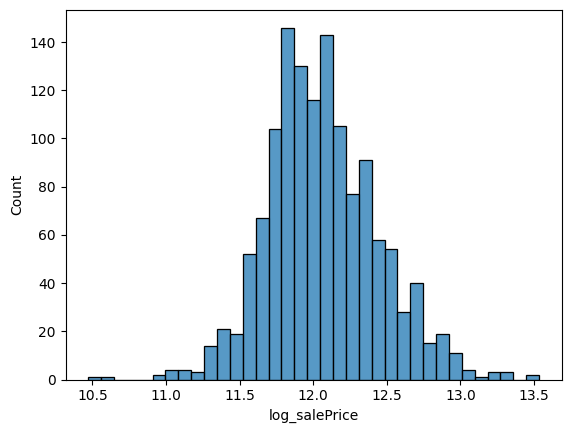

In [114]:
log_salePrice = np.log(df['SalePrice'])
log_salePrice.name = 'log_salePrice'
sns.histplot(log_salePrice)

Taking the log transform revels that there may be outliers in either tail of the distribution. We'll use a z-score of +/- 3 st. devs to determine whether there are actually any outliers and if so they will be removed.

In [124]:
# Adding the log_salePrice to the dataframe
df2 = pd.concat([df, log_salePrice], axis=1)
df2

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_salePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,8,2007,WD,Normal,175000,12.072541
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,2,2010,WD,Normal,210000,12.254863
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,2500,5,2010,WD,Normal,266500,12.493130
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,4,2010,WD,Normal,142125,11.864462


In [142]:
# Finding the log_salePrice values +/- 3 st. devs of the mean
upper_lim = df2['log_salePrice'].mean() + 3*df2['log_salePrice'].std()
lower_lim = df2['log_salePrice'].mean() - 3*df2['log_salePrice'].std()
print(upper_lim)
print(lower_lim)

13.194036248018524
10.932947254552381


In [145]:
# Checking if there are entries above the upper limit
df2[df2['log_salePrice'] >= upper_lim]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_salePrice
440,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,170,0,0,4,2009,WD,Normal,555000,13.226723
691,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,...,0,0,0,0,1,2007,WD,Normal,755000,13.534473
769,60,RL,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,...,0,210,0,0,6,2010,WD,Normal,538000,13.195614
803,60,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,192,0,0,1,2009,New,Partial,582933,13.275828
898,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,3,2010,New,Partial,611657,13.323927
1046,60,RL,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,...,0,0,0,0,7,2006,New,Partial,556581,13.229568
1169,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,7,2006,WD,Normal,625000,13.345507
1182,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,...,0,0,555,0,7,2007,WD,Abnorml,745000,13.521139


In [147]:
# Checking if there are entries below the lower limit
df2[df2['log_salePrice'] <= lower_lim]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_salePrice
30,70,C (all),8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,7,2008,WD,Normal,40000,10.596635
916,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,10,2006,WD,Abnorml,35311,10.471950


<AxesSubplot: xlabel='log_salePrice', ylabel='Count'>

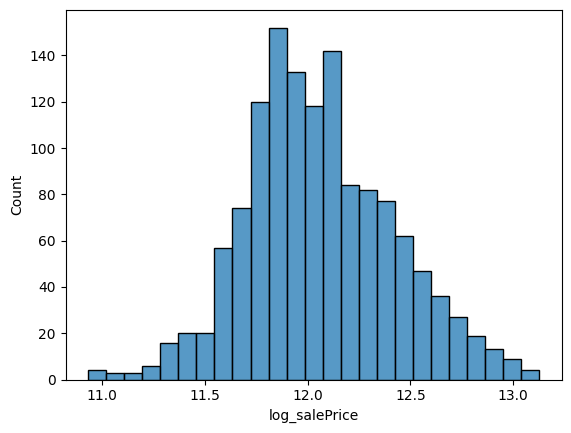

In [156]:
# Creating a new dataframe that only contains data where the log_salePrice values are +/- 3 st. devs of the mean
df3 = df2[(df2['log_salePrice'] > lower_lim) & (df2['log_salePrice'] < upper_lim)]
sns.histplot(df3, x='log_salePrice')

Since the log of the Sale Price follows a normal distribution we will use this to train the model and convert back to a regular Sale Price value after predictions have been made.

In [157]:
# Dropping the original SalePrice target
df3.drop(columns='SalePrice', inplace=True)

C:\Users\RyanHancox\AppData\Local\Temp\ipykernel_2876\2946610861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns='SalePrice', inplace=True)


### Numerical Feature Investigation

We have already confirmed previously that there are no outliers in the numerical features. Our next step will be to inspect the correlations between numerical features and the target.

In [181]:
# Lets begin by identifying the numerical features in the dataset
set(df3.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [182]:
# Selecting only the numeric features from the dataset
df_num = df3.select_dtypes(include= ['float64', 'int64'])
df_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,log_salePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247694
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109011
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317167
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849398
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,12.072541
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,12.254863
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,12.493130
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,11.864462


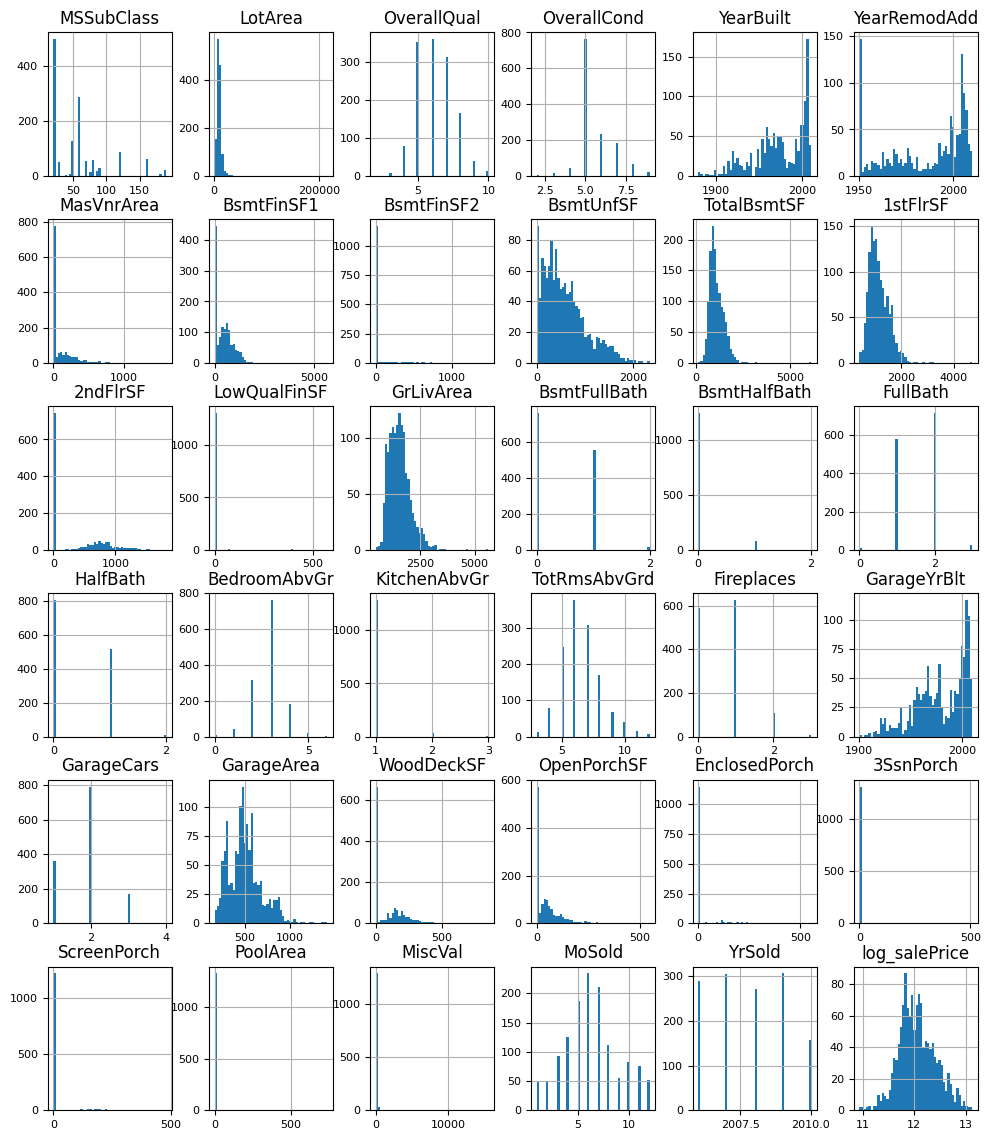

In [190]:
# Plotting the distributions of all the numerical features
df_num.hist(figsize=(12,14), bins=50, xlabelsize=8, ylabelsize=8);

In [203]:
# Looking at the number of unique values in each feature
df_num.nunique()

MSSubClass        15
LotArea          993
OverallQual        9
OverallCond        8
YearBuilt        109
YearRemodAdd      61
MasVnrArea       321
BsmtFinSF1       614
BsmtFinSF2       141
BsmtUnfSF        756
TotalBsmtSF      694
1stFlrSF         718
2ndFlrSF         389
LowQualFinSF      16
GrLivArea        812
BsmtFullBath       3
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr       7
KitchenAbvGr       3
TotRmsAbvGrd      10
Fireplaces         4
GarageYrBlt       97
GarageCars         4
GarageArea       429
WoodDeckSF       263
OpenPorchSF      196
EnclosedPorch    108
3SsnPorch         20
ScreenPorch       75
PoolArea           7
MiscVal           20
MoSold            12
YrSold             5
log_salePrice    610
dtype: int64

From the above we can see that there are features that appear highly correlated with one another (e.g '1stFlrSF' and 'TotalBsmtSF') and features with low variance (e.g 'LowQualFinSF', 'PoolArea'). We will keep these features for now and do some further investigation.

Next we will look at the correlation between the numerical features and the target.

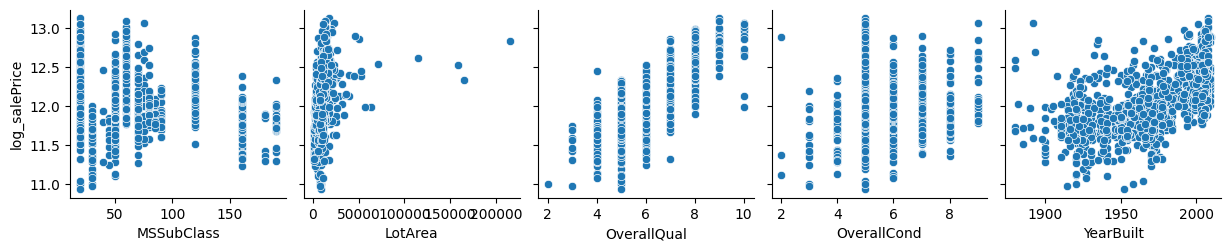

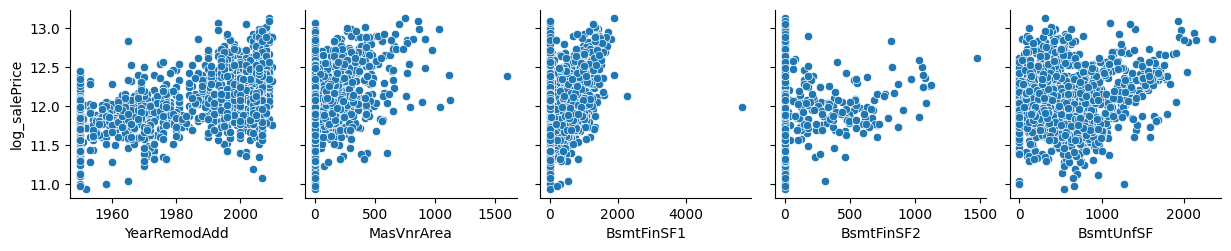

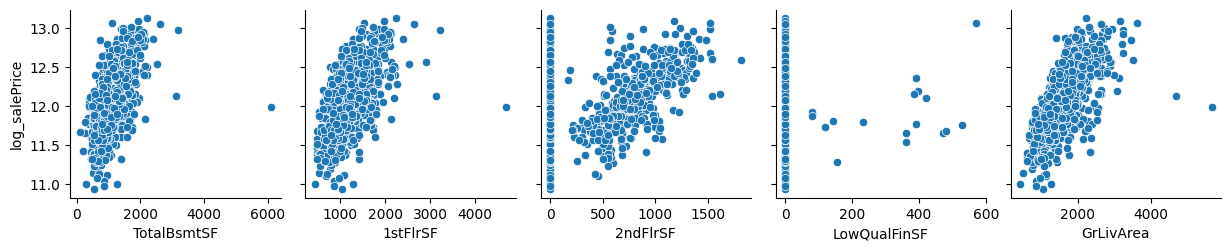

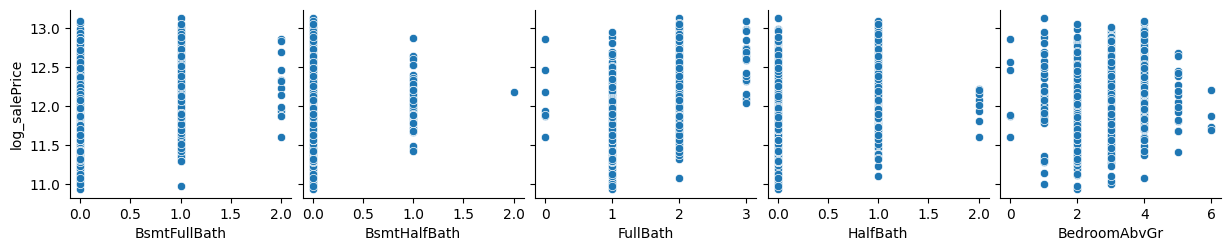

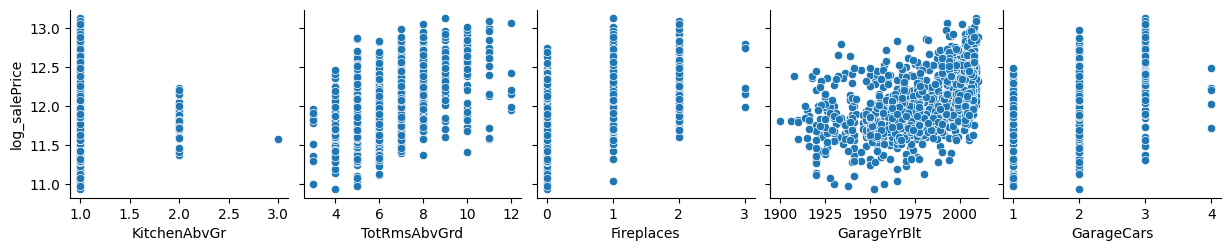

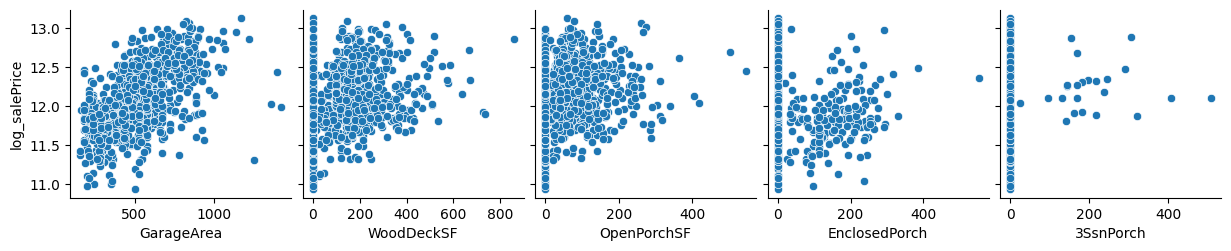

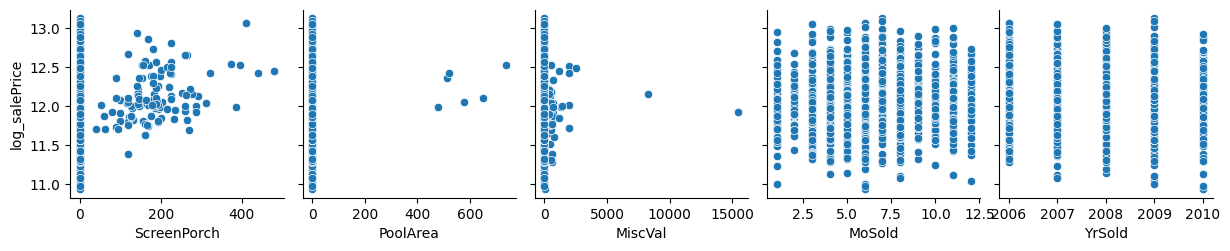

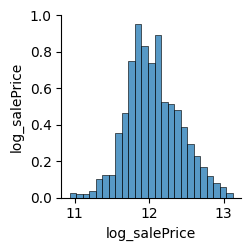

In [224]:
# Plotting the correlation between each numeric feature and the target
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(
        data=df_num, 
        x_vars=df_num.columns[i:i+5], 
        y_vars=['log_salePrice'],
        height= 2.5
    )
    

From the above we can see that there does appear to be correlation between some features and the target. Let now quantify this correlation and look at the top 15 highly correlated features. We will choose 15 to start with as this will likely then reduce with some features being highly correlated to one another.

In [276]:
# Finding the 15 most highly correlated features with the target
X_num = df_num.drop(columns='log_salePrice')
y_num = df_num['log_salePrice']

df_num_corr = X_num.apply(lambda x: x.corr(y_num))
num_corr_list = abs(df_num_corr).sort_values(ascending=False)
print(f'The top 15 correlated numerical features to the target are:\n{num_corr_list[0:15]}')

The top 15 correlated numerical features to the target are:
OverallQual     0.799448
GrLivArea       0.688004
GarageCars      0.653931
GarageArea      0.606399
FullBath        0.596204
1stFlrSF        0.580086
YearBuilt       0.575077
YearRemodAdd    0.568219
TotalBsmtSF     0.568072
GarageYrBlt     0.536041
TotRmsAbvGrd    0.529398
Fireplaces      0.462599
MasVnrArea      0.400180
OpenPorchSF     0.351119
BsmtFinSF1      0.318431
dtype: float64


As a sanity check we will use the sklearn 'SelectKBest' to also find the 15 monst correlated numerical features with the target and then check that it matches the above.

In [283]:
# Finding the 15 most highly correlated features with the target
from sklearn.feature_selection import SelectKBest, f_regression

num_fs = SelectKBest(f_regression, k=15)
Xt_num = num_fs.fit_transform(X_num, y_num)
print(X_num.shape)
print(Xt_num.shape)
num_fs.get_feature_names_out()


(1328, 35)
(1328, 15)


array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'OpenPorchSF'], dtype=object)

In [238]:
# Confirming the 15 most highly correlated numerical features to the target from each method matches.
set(num_corr_list.index[0:15]) == set(num_fs.get_feature_names_out())

True

Lets now take these most highly correlated numerical features to the target and check whether they are correlated to one another.

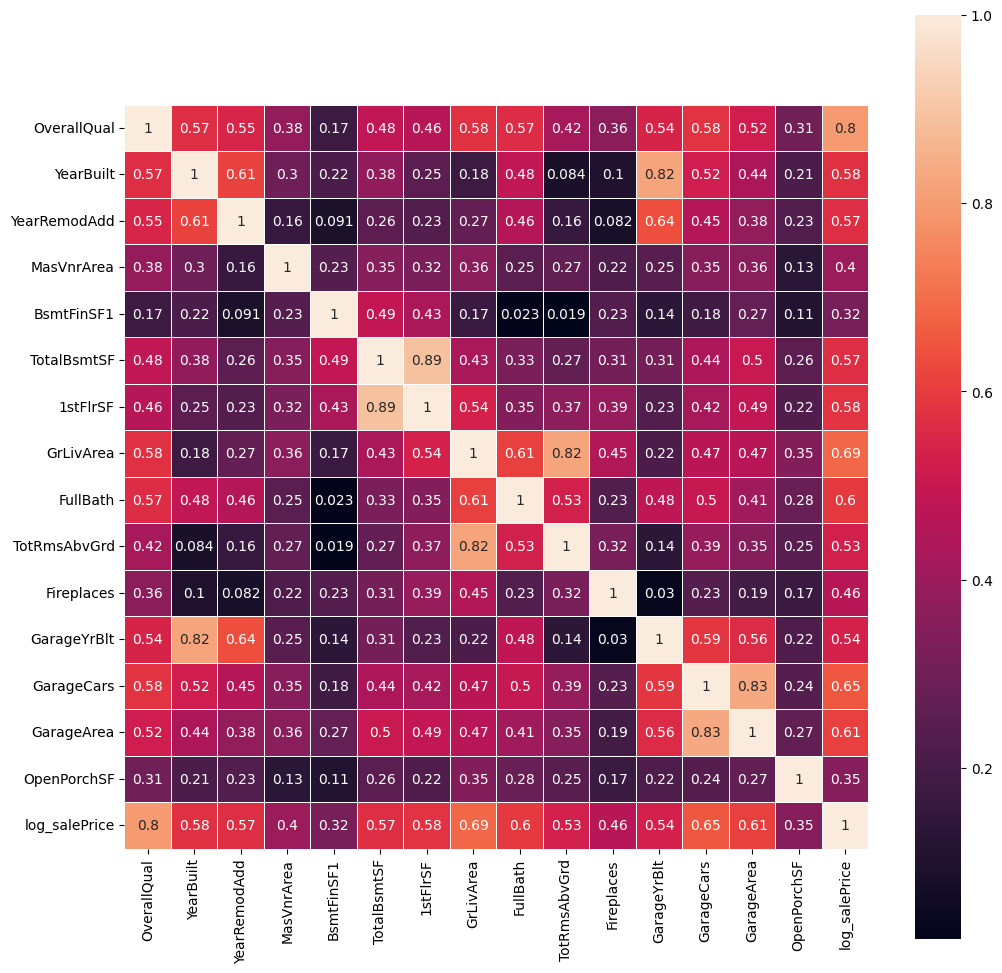

In [285]:
# Creating a dataframe just featuring the 15 most highly correlated numerical features to the target
df_num_fs = pd.concat([df_num[num_fs.get_feature_names_out()], df_num['log_salePrice']], axis=1)

# Checking the correlations between each feature (including the target)
num_corr = df_num_fs.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(num_corr, annot=True, square=True, linewidths=.5, ax=ax);

From the correlation heatmap above we can see that there are some numerical features that are highly correlated. Since highly correlated features will not add much extra information to the model, we will drop the ones that are less correlated to the target. I am going to set the correlation threshold to 0.8 for features to be dropped.

Using this criteria identifies the following features to be dropped:
* GarageYrBlt
* TotalBsmtSF
* TotRmsAbvGrd
* GarageArea

In [286]:
# Dropping the highly correlated features
df_num_fs.drop(columns=['GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea'], inplace=True)
df_num_fs.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OpenPorchSF,log_salePrice
0,7,2003,2003,196.0,706,856,1710,2,0,2,61,12.247694
1,6,1976,1976,0.0,978,1262,1262,2,1,2,0,12.109011
2,7,2001,2002,162.0,486,920,1786,2,1,2,42,12.317167
3,7,1915,1970,0.0,216,961,1717,1,1,3,35,11.849398
4,8,2000,2000,350.0,655,1145,2198,2,1,3,84,12.429216


Now we will once again check the remaining numerical features correlation to the target and decide whether to remove any low correlation features.

In [290]:
# Checking the correlations of each remaining numerical feature to the target again
X_num = df_num_fs.drop(columns='log_salePrice')
y_num = df_num_fs['log_salePrice']
df_num_corr = X_num.apply(lambda x: x.corr(y_num))
num_corr_list = abs(df_num_corr).sort_values(ascending=False)
num_corr_list

OverallQual     0.799448
GrLivArea       0.688004
GarageCars      0.653931
FullBath        0.596204
1stFlrSF        0.580086
YearBuilt       0.575077
YearRemodAdd    0.568219
Fireplaces      0.462599
MasVnrArea      0.400180
OpenPorchSF     0.351119
BsmtFinSF1      0.318431
dtype: float64

If we set a correlation to target threshold of 0.3 to begin with then we will keep all the remaining numerical features. Lets just put them into a list for future use.

In [291]:
num_features = num_corr_list.index
num_features

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', '1stFlrSF',
       'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'OpenPorchSF',
       'BsmtFinSF1'],
      dtype='object')

# Categorical Feature Investigation

Next we will investigate the categorical features in the dataset and identify those that will provide the most information to the model.

In [453]:
# Identifying the categorical features in the dataset
print(set(df3.dtypes.to_list()))

# Obtaining a dataframe of just categorical features
df_cat = df3.select_dtypes('O')
df_cat.head()

{dtype('float64'), dtype('int64'), dtype('O')}


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


Lets begin by visualising the distributions of each of the categorical features.

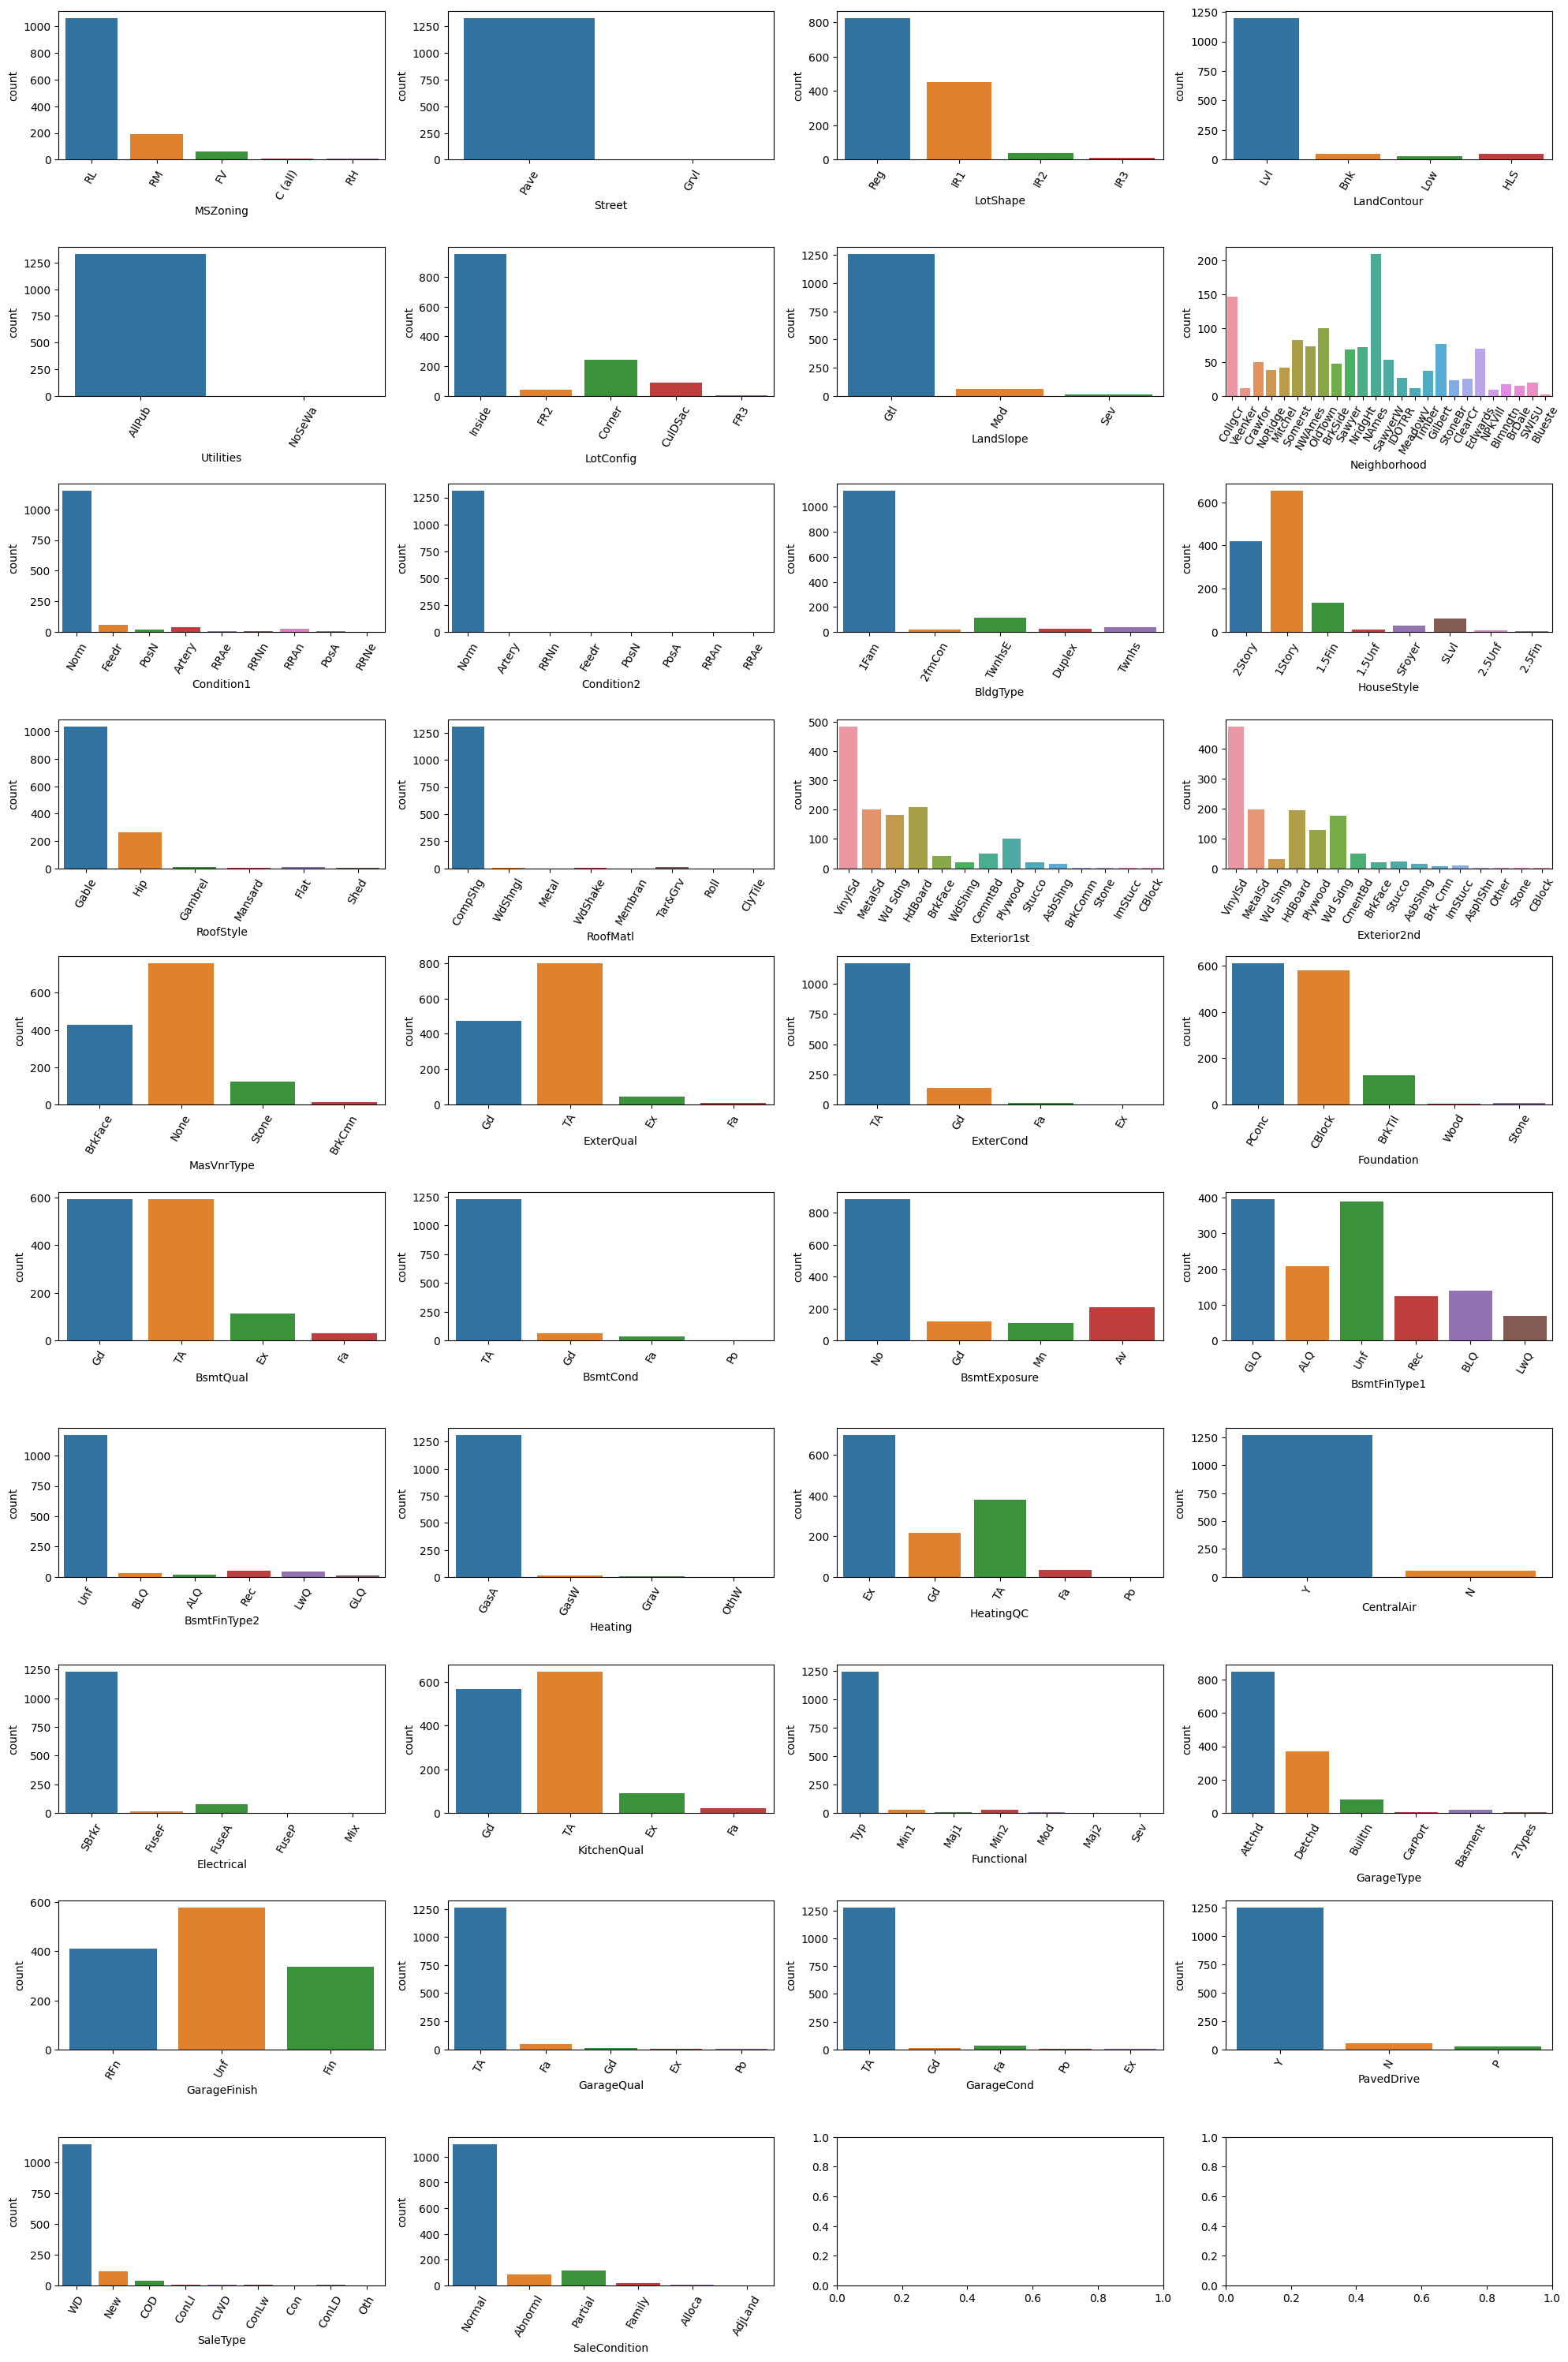

In [452]:
# Creating bar charts to visualise the distribution of each categorical variable
from math import ceil
fig, axes = plt.subplots(ceil(len(df_cat.columns)/4), 4, figsize=(20,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.tick_params(axis='x', labelrotation=60)
        sns.countplot(data=df_cat, x=df_cat.columns[i], ax=ax)

fig.tight_layout()

From the above plots we can see that there are many categorical features that do not have much variance across their values. Next we will drop any categorical features where there is a value that occurs in 80% or more of the data for that feature.

In [454]:
# For each categorical feature, determine whether there is a value that occurs in 
# 80% or more of the data for that feature
drop_list = []

for column in df_cat.columns:
    counts = df_cat[column].value_counts()
    proportions = counts.apply(lambda x: x/sum(counts))
    drop = proportions >= 0.8
    if True in drop.values:
        drop_list.append(column)

drop_list

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [455]:
# Dropping the low variance categorical features identified previously
df_cat_fs = df_cat.drop(columns=drop_list)
df_cat_fs.shape


(1328, 18)

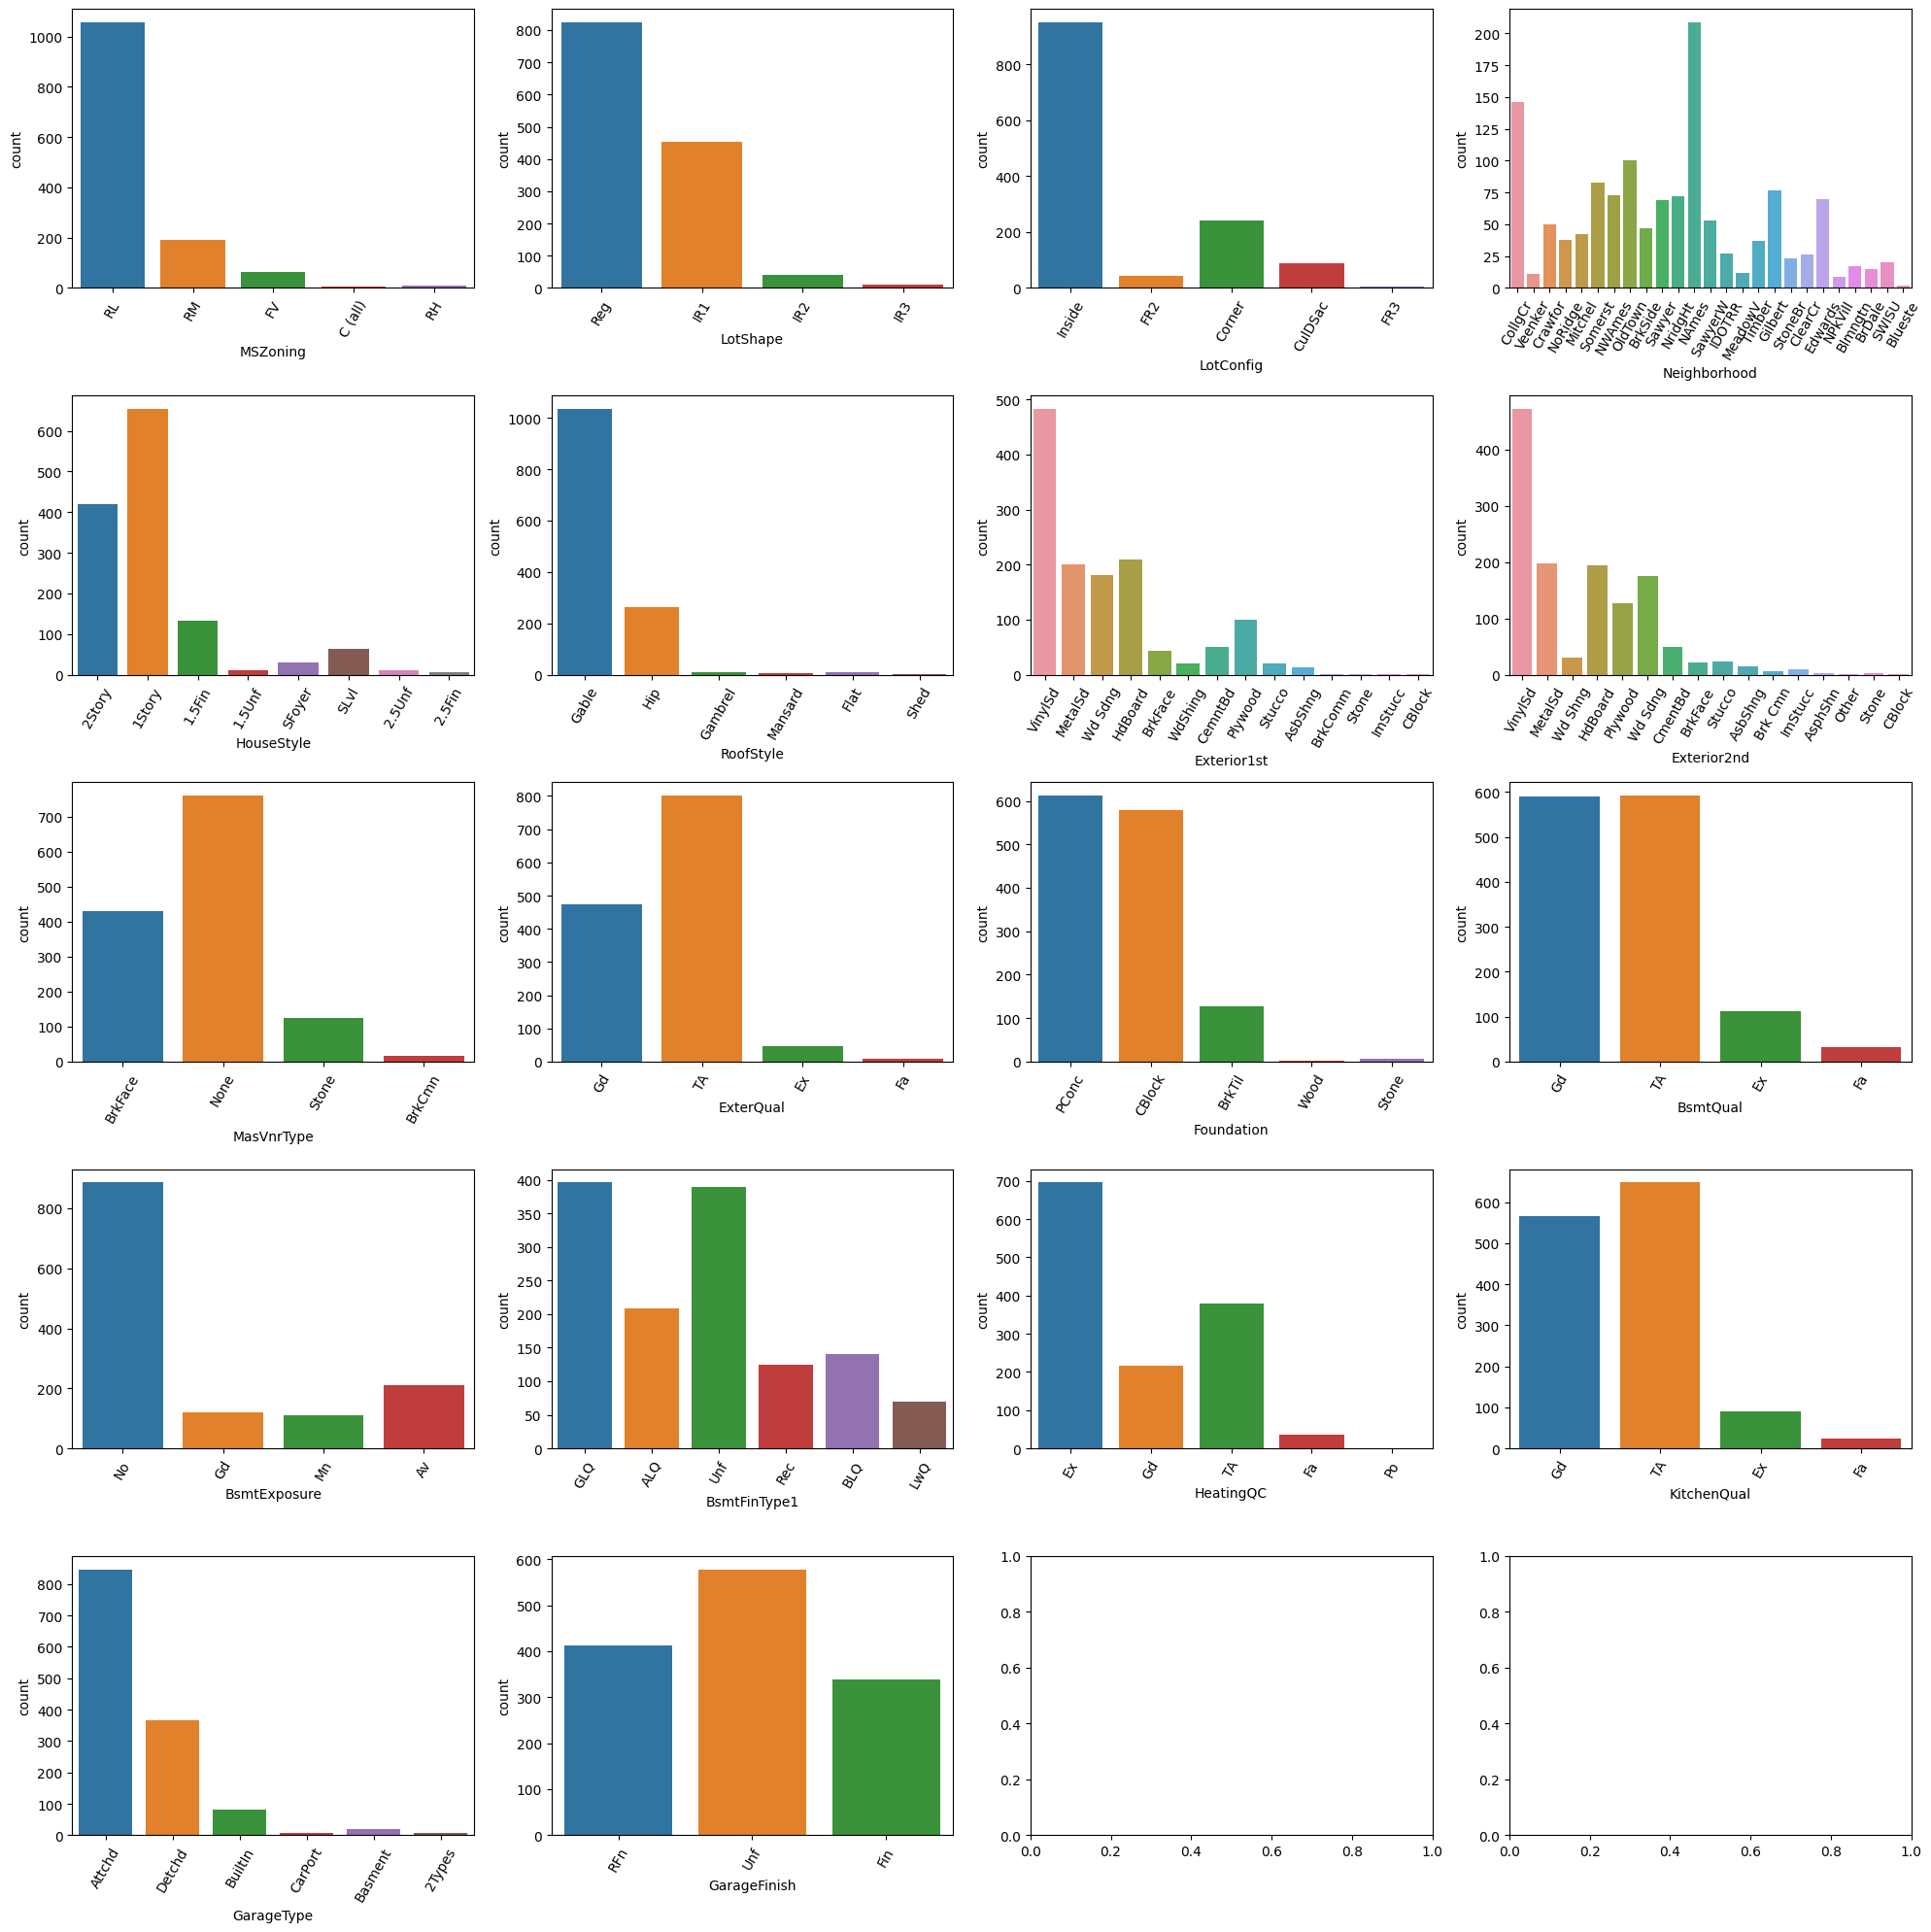

In [456]:
# Plotting distributions of remaining features as a sanity check
fig, axes = plt.subplots(ceil(len(df_cat_fs.columns)/4), 4, figsize=(20,20))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat_fs.columns):
        ax.tick_params(axis='x', labelrotation=60)
        sns.countplot(data=df_cat_fs, x=df_cat_fs.columns[i], ax=ax)

fig.tight_layout()

Next we will encode the remaining categorical features so that we can identify which ones are most correlated to the target. Note that most of the remaining categorical features are nominal so can be one-hot encoded. However, the following categorical features are ordinal and should be ordinal encoded:
* ExterQual
* BsmtQual
* BsmtExposure
* BsmtFinType1
* HeatingQC
* KitchenQual
* GarageFinish

In [457]:
# Encoding ordinal features
qual_map = {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
exp_map = {'Na':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
fin1_map = {'Na':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
garage_map = {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}

df_cat_fs['ord_BsmtExposure'] = df_cat_fs['BsmtExposure'].map(exp_map)
df_cat_fs['ord_BsmtFinType1'] = df_cat_fs['BsmtFinType1'].map(fin1_map)
df_cat_fs['ord_GarageFinish'] = df_cat_fs['GarageFinish'].map(garage_map)

columns = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']
for column in columns:
    df_cat_fs['ord_'+column] = df_cat_fs[column].map(qual_map)

columns.extend(['BsmtExposure', 'BsmtFinType1', 'GarageFinish'])
df_cat_fs.drop(columns=columns, inplace=True)
df_cat_fs

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,ord_BsmtExposure,ord_BsmtFinType1,ord_GarageFinish,ord_ExterQual,ord_BsmtQual,ord_HeatingQC,ord_KitchenQual
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,1,6,2,3,3,4,3
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,4,5,2,2,3,4,2
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,2,6,2,3,3,4,3
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd,1,5,1,2,2,3,3
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,3,6,2,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,2Story,Gable,VinylSd,VinylSd,None,PConc,Attchd,1,1,2,2,3,4,2
1456,RL,Reg,Inside,NWAmes,1Story,Gable,Plywood,Plywood,Stone,CBlock,Attchd,1,5,1,2,3,2,2
1457,RL,Reg,Inside,Crawfor,2Story,Gable,CemntBd,CmentBd,None,Stone,Attchd,1,6,2,4,2,4,3
1458,RL,Reg,Inside,NAmes,1Story,Hip,MetalSd,MetalSd,None,CBlock,Attchd,2,6,1,2,2,3,3


In [460]:
# One-hot encoding nominal features
columns = df_cat_fs.columns[:-6]
df_cat_fs = pd.get_dummies(df_cat_fs, columns=columns)
df_cat_fs.head()

,ord_BsmtFinType1,ord_GarageFinish,ord_ExterQual,ord_BsmtQual,ord_HeatingQC,ord_KitchenQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,ord_BsmtExposure_1,ord_BsmtExposure_2,ord_BsmtExposure_3,ord_BsmtExposure_4
0,6,2,3,3,4,3,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,5,2,2,3,4,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,6,2,3,3,4,3,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,5,1,2,2,3,3,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,6,2,3,3,4,3,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


Obviously, 108 categorical features is going to be way to many to develop a model with so we will once again look at the top 15 performing features.

In [461]:
# Finding the 15 most highly correlated features with the target
df_cat_corr = df_cat_fs.apply(lambda x: x.corr(y_num))
cat_corr_list = abs(df_cat_corr).sort_values(ascending=False)
print(f'The top 15 correlated categorical features to the target are:\n{cat_corr_list[0:15]}')

The top 15 correlated categorical features to the target are:
ord_ExterQual           0.670404
ord_BsmtQual            0.659613
ord_KitchenQual         0.656083
ord_GarageFinish        0.547243
Foundation_PConc        0.526627
GarageType_Detchd       0.469471
ord_HeatingQC           0.463596
Foundation_CBlock       0.379106
MSZoning_RM             0.364058
GarageType_Attchd       0.361485
MasVnrType_None         0.360209
Exterior2nd_VinylSd     0.357896
Exterior1st_VinylSd     0.356606
Neighborhood_NridgHt    0.351640
MasVnrType_Stone        0.302972
dtype: float64


If we again set a threshold correlation of 0.3 we will keep all of the above categorical features to develop a model with. Lets again store these feature names for future use and also plot the distrbutions of the top 15 categorical features with respect to log_salePrice.

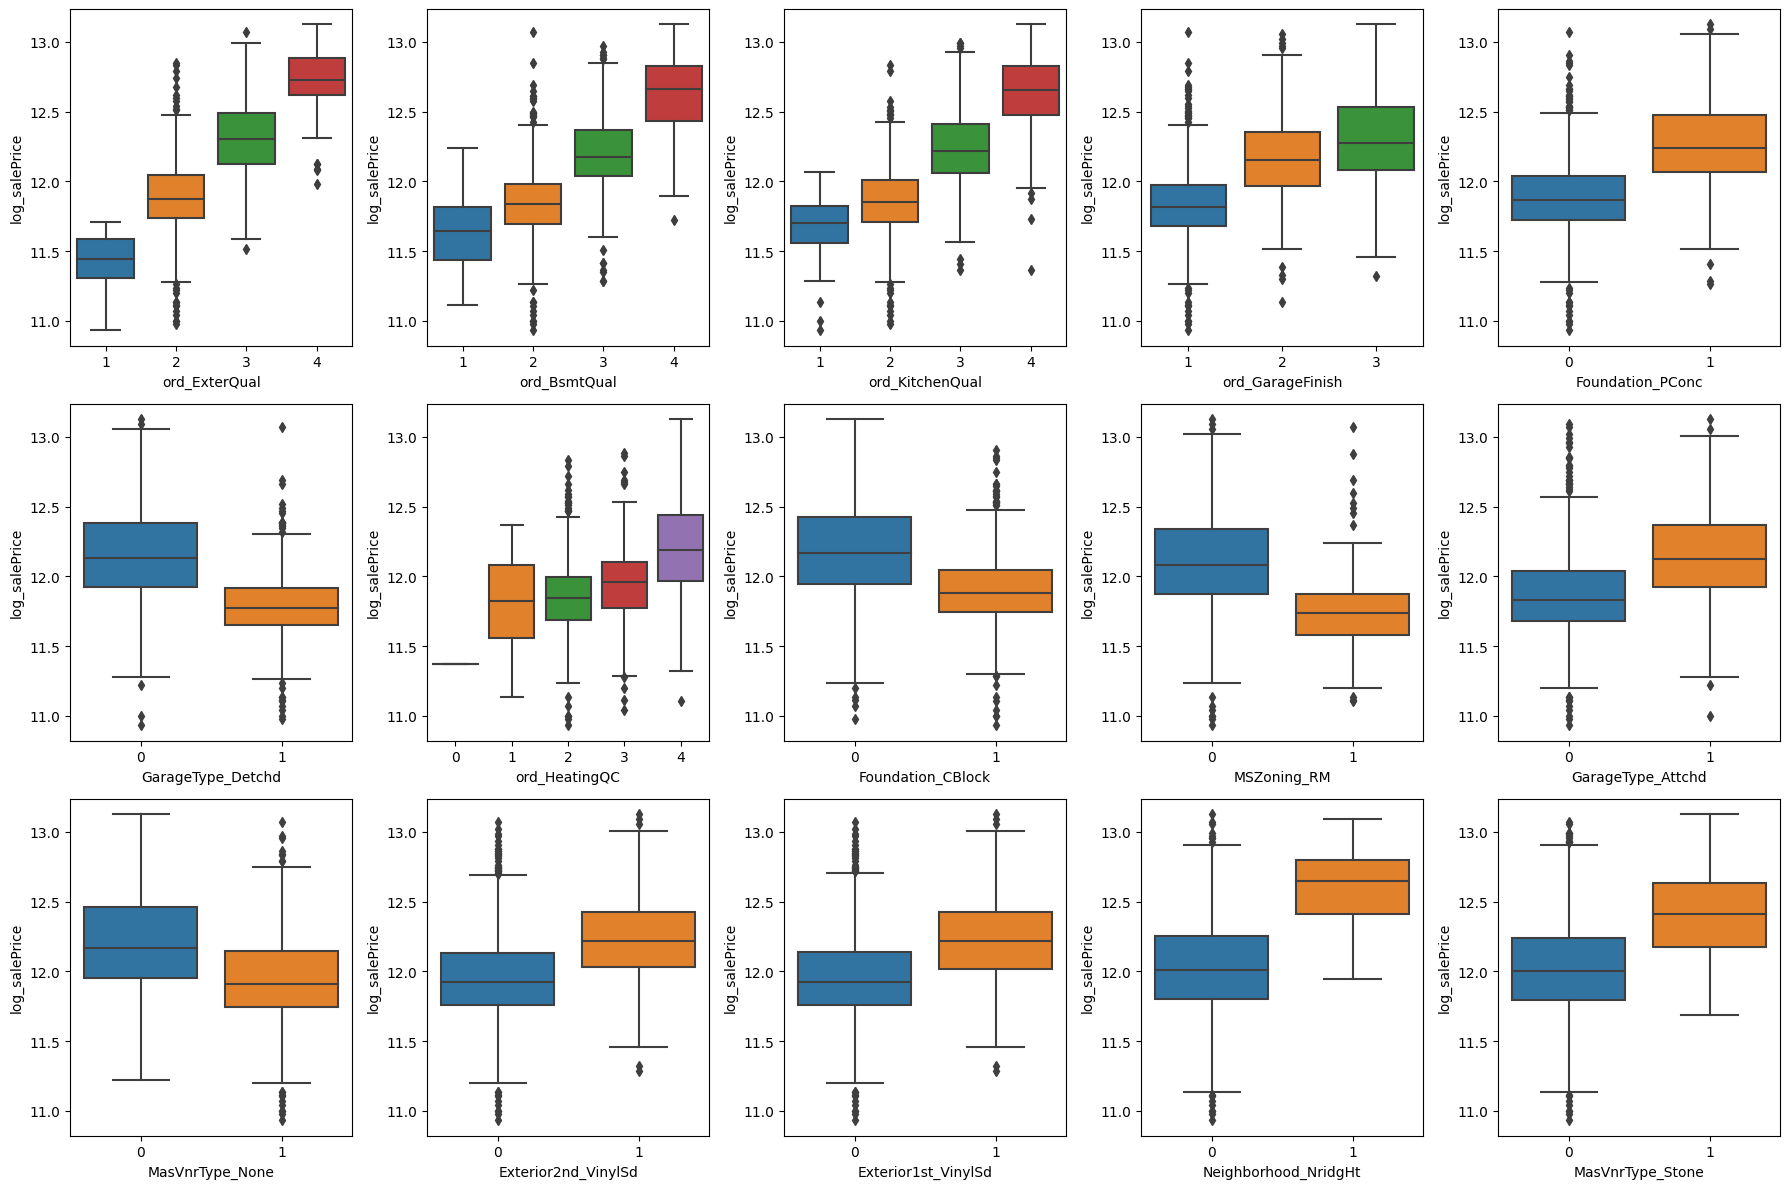

In [498]:
# Getting the feature names of the top 15 features
cat_features = cat_corr_list.index[:15]

# Plotting the correlation between each numeric feature and the target
df_cat_fs = pd.concat([df_cat_fs[cat_features], y_num], axis=1)

fig, axes = plt.subplots(3,5, figsize=(18,12))
for i, ax in enumerate(fig.axes):
    sns.boxplot(
        data = df_cat_fs,
        x = cat_features[i],
        y = 'log_salePrice',
        ax=ax
    )

plt.tight_layout()

# Feature Selected Data

We will now combine the numerical and categorical feature selected data before saving it. We will also combine and save all the chosen feature names in case we need to use them in any pipelines later.

In [497]:
# Combining the selected numerical and categorical features into a dataframe 
df_fs = df_num_fs.merge(right=df_cat_fs, left_index=True, right_index=True)

print(df_num_fs.shape)
print(df_cat_fs.shape)
print(df_fs.shape)

df_fs.head()

(1328, 12)
(1328, 16)
(1328, 28)


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,...,ord_HeatingQC,Foundation_CBlock,MSZoning_RM,GarageType_Attchd,MasVnrType_None,Exterior2nd_VinylSd,Exterior1st_VinylSd,Neighborhood_NridgHt,MasVnrType_Stone,log_salePrice_y
0,7,2003,2003,196.0,706,856,1710,2,0,2,...,4,0,0,1,0,1,1,0,0,12.247694
1,6,1976,1976,0.0,978,1262,1262,2,1,2,...,4,1,0,1,1,0,0,0,0,12.109011
2,7,2001,2002,162.0,486,920,1786,2,1,2,...,4,0,0,1,0,1,1,0,0,12.317167
3,7,1915,1970,0.0,216,961,1717,1,1,3,...,3,0,0,0,1,0,0,0,0,11.849398
4,8,2000,2000,350.0,655,1145,2198,2,1,3,...,4,0,0,1,0,1,1,0,0,12.429216


In [499]:
# Saving the feature selected dataframe
df_fs.to_csv(r'../data/formatted_data/train_fs_1.0')